In [1]:
# if the data is not available bring the dataset to current dir
!gdown 15e-elitduz-g79-yKSYXUbF8sWPr8Dn5

Downloading...
From: https://drive.google.com/uc?id=15e-elitduz-g79-yKSYXUbF8sWPr8Dn5
To: /content/holiday_rental.csv
100% 3.90M/3.90M [00:00<00:00, 174MB/s]


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR

In [25]:
# loading dataset
df = pd.read_csv('/content/holiday_rental.csv')

# **EDA**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   48895 non-null  int64  
 1   price                           48895 non-null  int64  
 2   minimum_nights                  48895 non-null  int64  
 3   number_of_reviews               48895 non-null  int64  
 4   calculated_host_listings_count  48895 non-null  int64  
 5   availability_365                48895 non-null  int64  
 6   avg_price_neighbourhood         48895 non-null  float64
 7   median_price_neighbourhood      48895 non-null  float64
 8   total_listings_neighbourhood    48895 non-null  int64  
 9   host_mean_price                 48895 non-null  float64
 10  ng_Bronx                        48895 non-null  uint8  
 11  ng_Brooklyn                     48895 non-null  uint8  
 12  ng_Manhattan                    

In [18]:
df.head()

,neighbourhood,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,avg_price_neighbourhood,median_price_neighbourhood,total_listings_neighbourhood,host_mean_price,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room
0,108,149,1,9,6,365,92.885714,70.0,175,100.666667,0,1,0,0,0,0,1,0
1,127,225,1,45,2,355,282.719094,210.0,1545,162.000000,0,0,1,0,0,1,0,0
2,94,150,3,0,1,365,118.974041,89.0,2658,150.000000,0,0,1,0,0,0,1,0
3,41,89,1,270,1,194,181.893357,120.0,572,89.000000,0,1,0,0,0,1,0,0
4,61,80,10,9,1,0,133.198747,99.0,1117,80.000000,0,0,1,0,0,1,0,0


<Axes: >

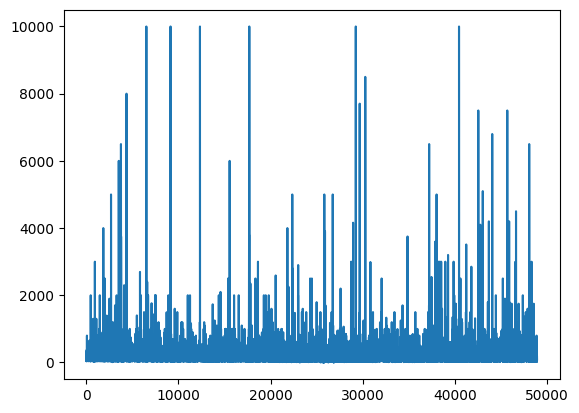

In [19]:
'''
Outliers!!!
'''
df.price.plot()

In [20]:
'''
Quartile 3 in price column shows quite a small amount as compared to max, which indicates OUTLIERS.
'''
df.describe()

,neighbourhood,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,avg_price_neighbourhood,median_price_neighbourhood,total_listings_neighbourhood,host_mean_price,ng_Bronx,ng_Brooklyn,ng_Manhattan,ng_Queens,ng_Staten Island,rt_Entire home/apt,rt_Private room,rt_Shared room
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,107.122732,152.720687,7.029962,23.274466,7.143982,112.781327,152.720687,116.679251,1514.691257,152.720687,0.022313,0.411167,0.443011,0.115881,0.007629,0.519665,0.456611,0.023724
std,68.743096,240.154170,20.510550,44.550582,32.952519,131.622289,62.296445,46.599433,1257.009523,227.856088,0.147701,0.492050,0.496747,0.320085,0.087009,0.499618,0.498119,0.152190
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,47.333333,34.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,51.000000,69.000000,1.000000,1.000000,1.000000,0.000000,107.678244,80.000000,392.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.000000,106.000000,3.000000,5.000000,1.000000,45.000000,143.802806,105.000000,1117.000000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,178.000000,175.000000,5.000000,24.000000,2.000000,227.000000,188.948276,150.000000,2465.000000,179.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,220.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000,800.000000,800.000000,3920.000000,10000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

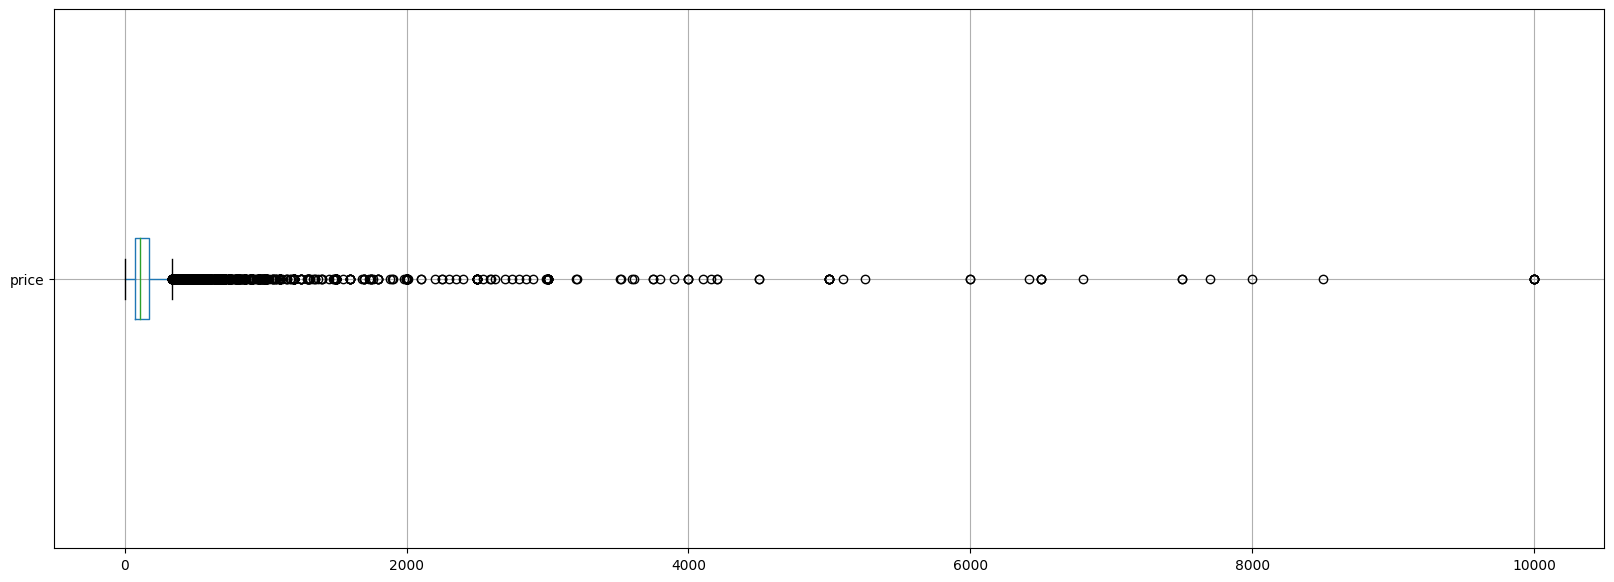

In [21]:
df.boxplot(column='price',figsize=(20,7),vert = False)

'\nUpper whisker seems to be around around 330-ish\n'

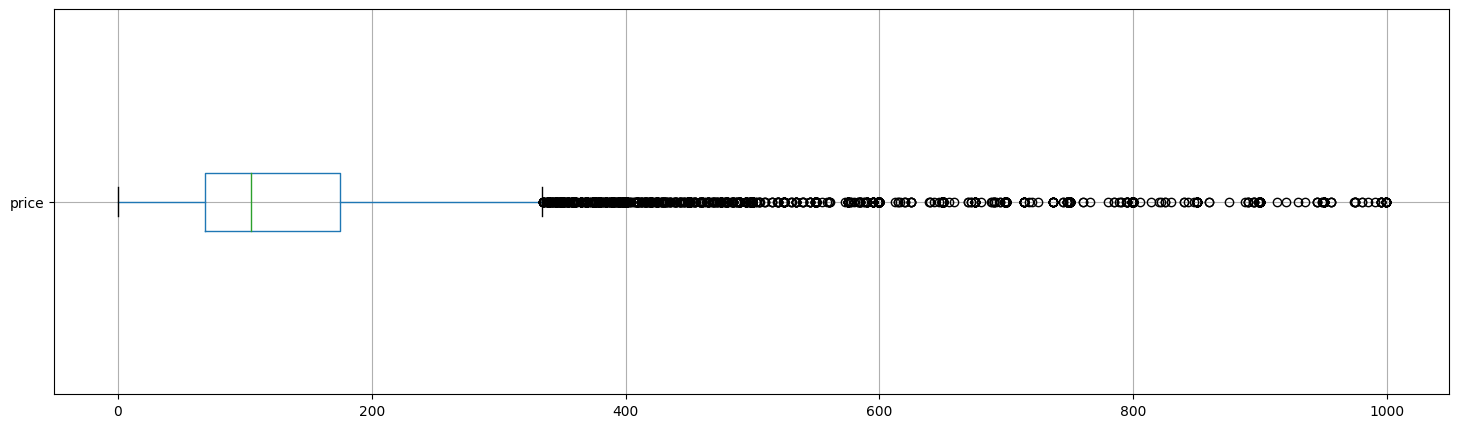

In [22]:
# zooming in into boxplot
df[df.price < 1000].boxplot(column='price',figsize=(18,5),vert = False)

'''
Upper whisker seems to be around around 330-ish
'''

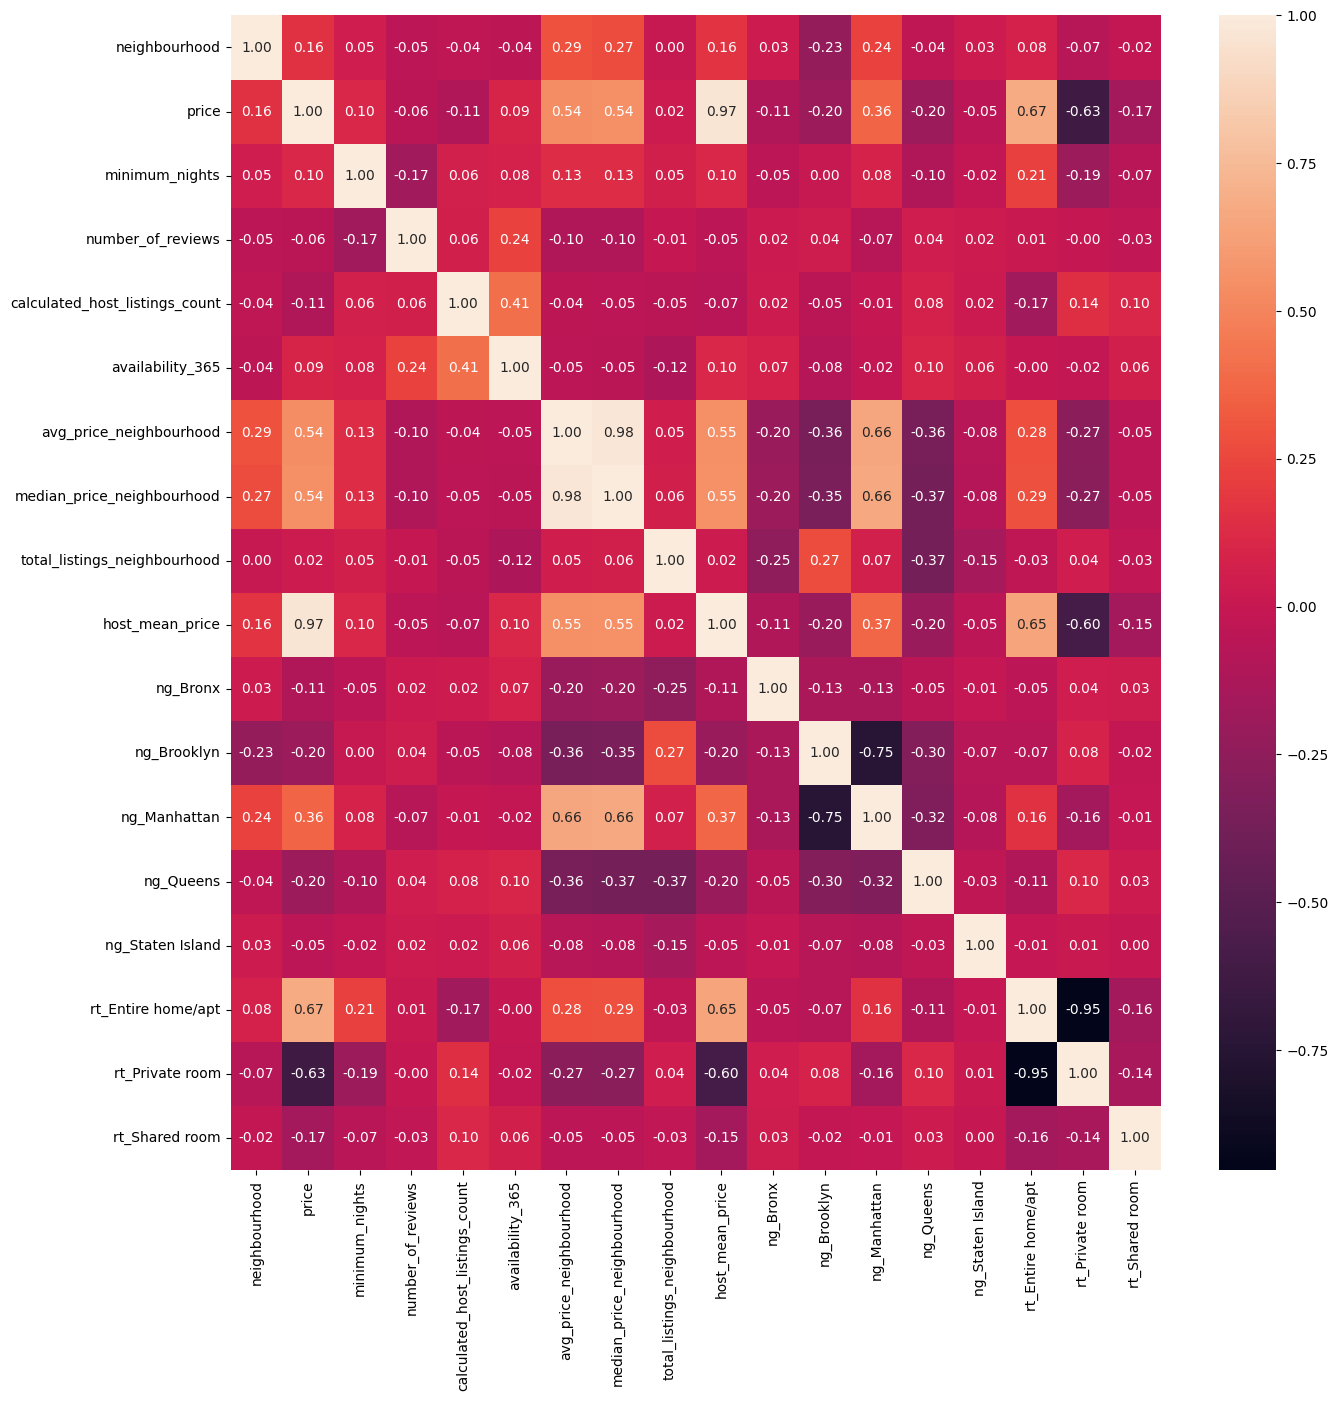

In [23]:
df2 = df.copy()
le = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = le.fit_transform(df2[col]).astype('float64')
plt.figure(figsize=(15, 15))  # Adjust size here
sns.heatmap(df2.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f')
plt.show()

# **Feature Engineering**

removing not so important columns

In [26]:
# removing not so important columns
columns_to_drop = ['id','last_review','reviews_per_month']
df.drop(columns=columns_to_drop,inplace=True, errors="ignore")

Aggregating dataset

In [27]:
temp = df.copy()
# Aggregating data by neighbourhood
neighbourhood_agg_updated = df.groupby('neighbourhood').agg(
    avg_price_neighbourhood=pd.NamedAgg(column='price', aggfunc='mean'),
    median_price_neighbourhood=pd.NamedAgg(column='price', aggfunc='median'),
    total_listings_neighbourhood=pd.NamedAgg(column='price', aggfunc='count')
)

# neighbourhood_group_agg_updated = df.groupby('neighbourhood_group').agg(
#     avg_price_neighbourhood_group=pd.NamedAgg(column='price', aggfunc='mean'),
#     median_price_neighbourhood_group=pd.NamedAgg(column='price', aggfunc='median'),
#     total_listings_neighbourhood_group=pd.NamedAgg(column='price', aggfunc='count')
# )

new_columns = ['avg_price_neighbourhood', 'median_price_neighbourhood', 'total_listings_neighbourhood']#, 'avg_price_neighbourhood_group', 'median_price_neighbourhood_group', 'total_listings_neighbourhood_group']
temp.drop(columns=new_columns,inplace=True, errors="ignore")
temp = temp.merge(neighbourhood_agg_updated,on='neighbourhood',how='left')
# temp = temp.merge(neighbourhood_group_agg_updated,on='neighbourhood_group',how='left')

df[new_columns] = temp[new_columns]

In [28]:
'''
Mean Encoding: Compute the mean price per host
As contribution of the host_id could probably be the average prices they offered (based on quality of services). So, we represent them by that.
'''
mean_price_per_host = df.groupby('host_id')['price'].mean().to_dict()
df['host_mean_price'] = df['host_id'].map(mean_price_per_host)
df.host_mean_price.fillna(0,inplace=True)

encoding features

In [29]:
# One-Hot-Encoding
nghbr_ohe = pd.get_dummies(df['neighbourhood_group'], prefix='ng')
room_type_ohe = pd.get_dummies(df['room_type'], prefix='rt')

# Label Encoding
label_encoder = LabelEncoder()
df['neighbourhood'] = label_encoder.fit_transform(df['neighbourhood'])

# Combining all features
df = pd.concat([df, nghbr_ohe, room_type_ohe], axis=1)

Dropping features which are being represented by encoded values

In [30]:
df.drop(['neighbourhood_group', 'room_type', 'host_id' ], axis=1, inplace=True,errors="ignore")

In [32]:
# df2 = df.copy()
# le = LabelEncoder()
# for col in df2.select_dtypes(include=['object']).columns:
#     df2[col] = le.fit_transform(df2[col]).astype('float64')
# plt.figure(figsize=(15, 15))  # Adjust size here
# sns.heatmap(df2.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f')
# plt.show()

# **Train and Test (With Outliers)**

In [144]:
# # Data normalization
# scaler = MinMaxScaler()

# # Select columns to scale
# columns_to_scale = df.columns

# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# df.describe()

In [145]:
# Input Featurex (X) and Label Creation (Y)
X = df.drop('price', axis=1)
y = df['price']

In [146]:
# Validation Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
# Prepare a dictionary to store the models and their results
models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'SVR': SVR(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

results = {}

# Train each model and compute the RMSE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = (rmse, mae)

In [148]:
# Output the results
results

{'RandomForestRegressor': (79.94434637534907, 12.000776224660173),
 'LinearRegression': (84.3269623808165, 14.784254448515158),
 'Ridge': (84.32695671775089, 14.784030090836469),
 'Lasso': (84.34366561259664, 13.56785304874056),
 'SVR': (163.4008329184013, 31.96671722963369),
 'GradientBoostingRegressor': (90.70752849583593, 14.919129707459545)}

In [ ]:
# '''
# If scaling is used and we want to evaluate on original scale.
# '''
# for key,item in results.items():
#   print(key,item[0] * 10000 , item[1] * 10000)

Random forest have given MRSE and MAE  = (80, 12) respectively. This looks good on the scale of 0 - 100000 prices. But this is unrealistic as we know the mean of the price is at 100-ish and Quartile-3 is at 179-ish. RMSE given here is around 80% of the mean. Let's now try to remove outlier and train a model.

# **Removing Outliers and Re-Training**

In [169]:
'''
1. Calculate the outlier thresholds for the price column using the IQR method
2. Remove Outlier
'''
# quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# interquartile range
IQR = Q3 - Q1

# define thresholds
lower_threshold = Q1 - 1.5 * IQR
upper_threshold = Q3 + 1.5 * IQR

print(lower_threshold, upper_threshold)

'''
keeping the lower threshold > 0 as a room could not be for free.
Could be promotional, but there are samples minnimum_rent_days is over a week. Which doesn't make sense.
'''
# apply thresholds
df = df[(df.price > 0) & (df.price <= upper_threshold) ]

-90.0 334.0


In [159]:
# # Data normalization
# scaler = MinMaxScaler()

# # Select columns to scale
# columns_to_scale = df.columns

# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
# df.describe()

In [161]:
# Splitting data into features and target again
X = df.drop('price', axis=1)
y = df['price']

In [162]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [163]:
# Prepare a dictionary to store the models and their results
models = {
    'RandomForestRegressor': RandomForestRegressor(random_state=42),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(random_state=42),
    'Lasso': Lasso(random_state=42),
    'SVR': SVR(),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=42)
}

results = {}

# Train each model and compute the RMSE
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    results[name] = (rmse, mae)

In [171]:
results

{'RandomForestRegressor': (18.642671175442153, 6.868260273995245),
 'LinearRegression': (27.971417836919898, 17.549428325972723),
 'Ridge': (27.97124424441503, 17.549033040844424),
 'Lasso': (27.873346902662, 17.16172488995408),
 'SVR': (37.41111395469312, 26.107734289389665),
 'GradientBoostingRegressor': (18.890803578615568, 8.295036379128181)}

An RMSE of 18.64 within a price range of 0 to 334, accounting for about 5.45% of the maximum price, indicates a relatively low prediction error. This figure is also roughly 10.9% of the estimated average price (179), which is generally viewed as a favorable outcome. The removal of outliers has likely decreased the data's variance, contributing to the lower RMSE.



---


**Conclusion: outliers can impact in these ways:**


Outliers can significantly impact the performance of a predictive model. Their presence can skew the distribution of the data, lead to a misrepresentation of the underlying trends, and ultimately result in a less accurate model. More specifically, outliers can:

* Distort the Mean and Variance: Outliers can artificially inflate or deflate the mean price, which in turn affects the variance. Since many models, especially those assuming normality, are sensitive to these statistics, this can lead to a model that does not accurately represent the majority of the data.

* Affect Model Coefficients: In regression models, outliers can disproportionately influence the coefficients, potentially leading to a model that overfits to these anomalies instead of capturing the general trend.

* Reduce Model Precision: The presence of outliers can lead to higher error metrics (such as RMSE and MAE), indicating a less precise model.


---

